## **ARIMA Model Analysis**

Possible Models to test:
- Moving Average Time Series Model
- Autoregressive Model

Features: Group_Name, group_id, time_sequnece

### **DataFrame**
Grabs the training and testing dataset from google drive

In [7]:
import pandas as pd
training_url = 'https://drive.google.com/file/d/1uVq3dwf4CKwLd5U0Y8uMOjxkjjXmXfvO/view?usp=sharing'
testing_url="https://drive.google.com/file/d/1X-8bWKM8-k89ORWyXcWAAuJTMuj2UDBC/view?usp=sharing"
training_file_id=training_url.split('/')[-2]
testing_file_id = testing_url.split('/')[-2]
teest_dwn_url='https://drive.google.com/uc?id=' + testing_file_id
train_dwn_url = 'https://drive.google.com/uc?id=' + training_file_id
training_dataset = pd.read_csv("C:\\Users\\garfi\\Downloads\\TAPS Logged Data-20231107T191350Z-001\\Train_Readable.csv")
testing_dataset = pd.read_csv("C:\\Users\\garfi\\Downloads\\TAPS Logged Data-20231107T191350Z-001\\Predict_Test_Readable_Month.csv")
print(training_dataset.head())
print(testing_dataset.head())

   group_id          arrive_time          depart_time  Fleet_Number   
0    2375.0  2023-05-15 07:35:09  2023-05-15 07:35:49           934  \
1    1505.0  2023-05-15 07:37:54  2023-05-15 07:39:15           934   
2    2375.0  2023-05-15 07:53:50  2023-05-15 07:55:10           934   
3    1505.0  2023-05-15 07:57:12  2023-05-15 07:58:15           934   
4    2375.0  2023-05-15 08:24:28  2023-05-15 08:24:48           934   

   Timepoint  Time Difference Type Time      Group_Name dayofweek   
0          1  0 days 00:03:26    depart  bayhi_to_oakes         M  \
1          1  0 days 00:03:26    depart  bayhi_to_oakes         M   
2          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
3          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
4          1  0 days 00:02:40    depart  bayhi_to_oakes         M   

              Sequence  
0  05:00:00 - 07:45:00  
1  05:00:00 - 07:45:00  
2  07:50:00 - 07:55:00  
3  07:55:00 - 08:00:00  
4  08:05:00 - 09:00:00  
   group

### **Filter Data**
- Filter the data so data vizualization makes sense

In [8]:
def filter_datasets(group_id, dayofweek):
    #---- Filtered Training Data ----
    filtered_training_data = training_dataset.copy()
    filtered_testing_data = testing_dataset.copy()
    filtered_training_data = training_dataset[training_dataset["dayofweek"].apply(lambda x: x in dayofweek)]
    #filtered_training_data = filtered_training_data[filtered_training_data["Sequence"] == "05:00:00 - 07:45:00"]
    #filtered_training_data = filtered_training_data[filtered_training_data["Type Time"].apply(lambda x : x in "depart")]
    filtered_training_data = filtered_training_data[filtered_training_data["arrive_time"].apply(lambda x: x.split("-")[1] in ["05", "04"])]
    filtered_training_data = filtered_training_data[filtered_training_data["depart_time"].apply(lambda x: x.split("-")[1] in ["05", "04"])]
    filtered_training_data["arrive_time"] = pd.to_datetime(filtered_training_data["arrive_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
    filtered_training_data["depart_time"] = pd.to_datetime(filtered_training_data["depart_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
    #filtered_training_data["arrive_time"].apply(lambda x: x.replace(year=1990, month=1, day=1))
    # arrivaldataFrame = pandas.to_datetime(timesubset["arrive_time"], format="%Y-%m-%d %H:%M:%S")
    filtered_training_data = filtered_training_data.loc[filtered_training_data["group_id"] == group_id]

    #---- Filtered Testing Data ----
    filtered_testing_data = testing_dataset[testing_dataset["dayofweek"].apply(lambda x: x in dayofweek)]
    #filtered_testing_data = filtered_testing_data[filtered_testing_data["Sequence"] == "05:00:00 - 07:45:00"]
    #filtered_testing_data = filtered_testing_data[filtered_testing_data["Type Time"].apply(lambda x : x in "depart")]
    filtered_testing_data = filtered_testing_data[filtered_testing_data["arrive_time"].apply(lambda x: x.split("-")[1] in ["10", "11"])]
    filtered_testing_data = filtered_testing_data[filtered_testing_data["depart_time"].apply(lambda x: x.split("-")[1] in ["10", "11"])]
    filtered_testing_data["arrive_time"] = pd.to_datetime(filtered_testing_data["arrive_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
    filtered_testing_data["depart_time"] = pd.to_datetime(filtered_testing_data["depart_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
    #filtered_testing_data["Time Difference"] = filtered_testing_data[filtered_training_data["Time Difference"]]
    filtered_testing_data = filtered_testing_data.loc[filtered_testing_data["group_id"] == group_id]
    #filtered_training_data.to_csv("G:\\My Drive\\Fall 2023\\TIM 147\\Bus-Data-Project\\output_train.csv", index=False, header=True)
    columns_to_drop = ["group_id", "Type Time", "Group_Name", "dayofweek", "Timepoint", "Fleet_Number", "Sequence"]
    typetimelist = filtered_training_data["Type Time"].tolist()
    Numberofdepart = 0
    Numberofarrive = 0
    time_column_name = ""
    for x in typetimelist:
        if "depart" == x:
            Numberofdepart +=1
        else:
            Numberofarrive +=1
    if Numberofarrive > Numberofdepart:
        columns_to_drop.append("depart_time")
        time_column_name = "arrive_time"
    else: 
        columns_to_drop.append("arrive_time")
        time_column_name = "depart_time" 

    filtered_training_data.drop(columns=columns_to_drop, inplace=True)
    filtered_testing_data.drop(columns=columns_to_drop, inplace=True)
    #filtered_testing_data.to_csv("./output.csv", index=False, header=True)
    return filtered_training_data, filtered_testing_data, time_column_name

filtered_training_data, filtered_testing_data, time_column = filter_datasets(2375, "MWF")
print("Filter train", filtered_training_data)
print("Filter Test", filtered_testing_data)

Filter train              depart_time  Time Difference
0    1990-01-01 07:35:49  0 days 00:03:26
2    1990-01-01 07:55:10  0 days 00:03:05
4    1990-01-01 08:24:48  0 days 00:02:40
6    1990-01-01 08:38:22  0 days 00:03:53
8    1990-01-01 09:04:00  0 days 00:03:57
...                  ...              ...
2882 1990-01-01 14:05:57  0 days 00:06:06
2884 1990-01-01 14:26:18  0 days 00:04:00
2932 1990-01-01 08:29:57  0 days 00:03:05
2944 1990-01-01 09:19:54  0 days 00:03:29
2960 1990-01-01 08:09:46  0 days 00:02:52

[409 rows x 2 columns]
Filter Test              depart_time  Time Difference
6    1990-01-01 10:40:28  0 days 00:03:33
8    1990-01-01 11:20:06  0 days 00:03:40
10   1990-01-01 11:41:13  0 days 00:05:23
12   1990-01-01 12:52:25  0 days 00:03:53
14   1990-01-01 13:16:17  0 days 00:03:41
...                  ...              ...
1852 1990-01-01 08:27:49  0 days 00:03:01
1854 1990-01-01 08:29:28  0 days 00:03:03
1856 1990-01-01 13:55:14  0 days 00:03:09
1866 1990-01-01 11:26:51  0

### **Data Visualization**
- Vizusalize the data with group name and time

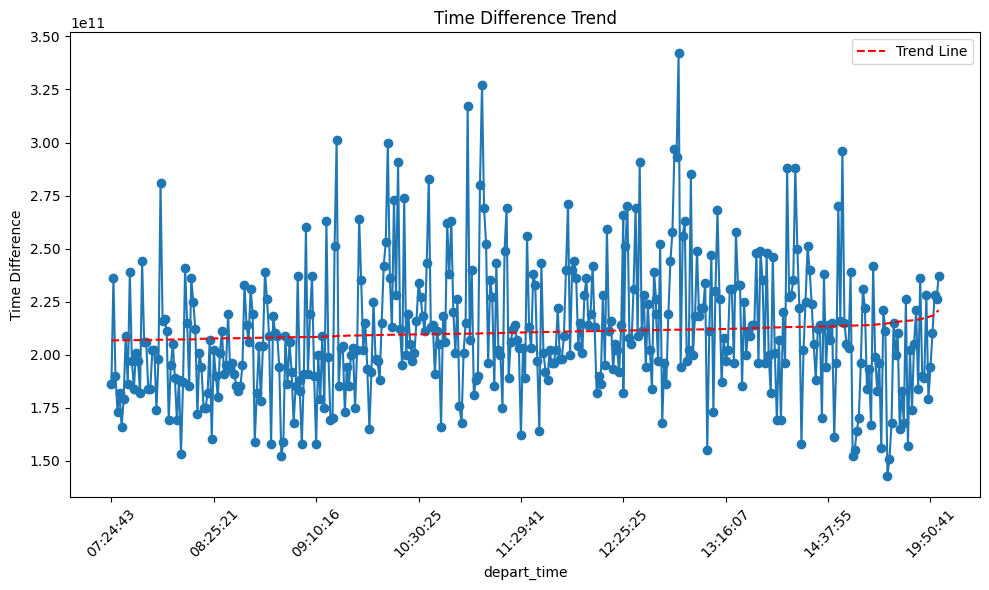

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates
import numpy as np
def Viszualize_Train_Data(filtered_training_data, Time_Column): 
    filtered_training_data[Time_Column] = pd.to_datetime(filtered_training_data[Time_Column])
    filtered_training_data['Time Difference'] = pd.to_timedelta(filtered_training_data['Time Difference'])
    
    meanofy = np.mean(filtered_training_data['Time Difference'].dt.total_seconds())
    
    for index, value in zip(filtered_training_data['Time Difference'].dt.total_seconds().index, filtered_training_data['Time Difference'].dt.total_seconds().values):
        if value > meanofy + 150:
            filtered_training_data.drop([index], inplace=True)
    # Sort the data by depart_time
    filtered_training_data.sort_values(Time_Column, inplace=True)
    time_only = filtered_training_data[Time_Column].dt.strftime('%H:%M:%S')

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(time_only, filtered_training_data['Time Difference'], marker='o', linestyle='-')

    # Adding a trend line (linear regression)
    x = mdates.date2num(filtered_training_data[Time_Column])  # Convert to floating-point representation of dates
    y = filtered_training_data['Time Difference'].dt.total_seconds()

    coefficients = np.polyfit(x, y, 1)
    trend = np.poly1d(coefficients)
    plt.plot(time_only, pd.to_timedelta(trend(x), unit='s'), linestyle='--', color='red', label='Trend Line')

    plt.xlabel(Time_Column)
    plt.ylabel('Time Difference')
    plt.title('Time Difference Trend')
    plt.legend()
    # Setting up major ticks for every 5th data point (adjust as needed)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

    # Formatting x-axis ticks as HH:MM:SS
    plt.xticks(rotation=45)

    plt.tight_layout()

    # Show plot
    plt.show()
    return filtered_training_data

filtered_training_data = Viszualize_Train_Data(filtered_training_data, time_column)

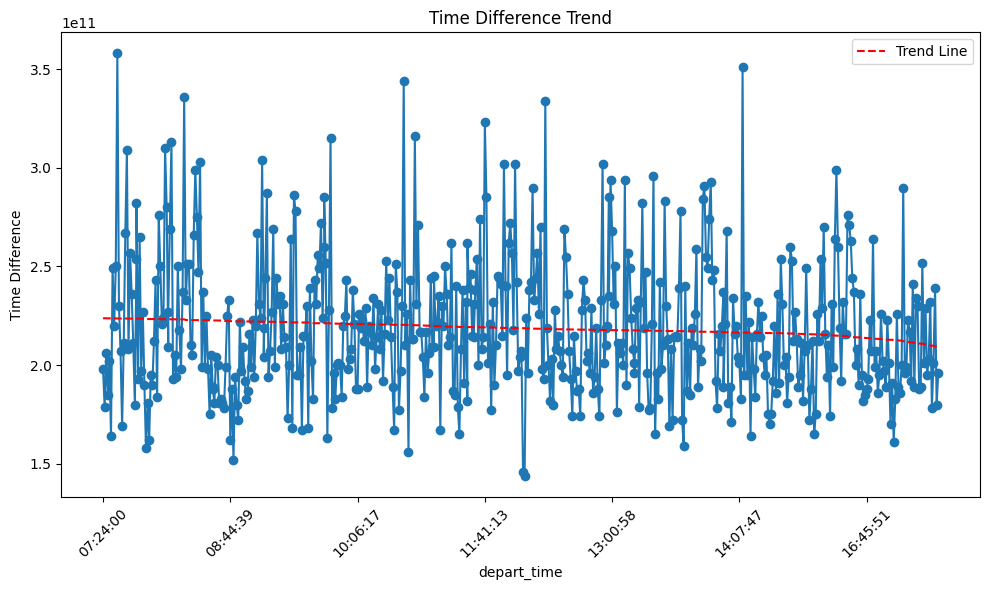

In [10]:
#filtered_testing_data.drop([466, 2456,2458], inplace=True)
import numpy as np

def Viszualize_Test_Data(filtered_testing_data, time_column):
    #filtered_testing_data.drop([466, 2456,2458], inplace=True)
    filtered_testing_data[time_column] = pd.to_datetime(filtered_testing_data[time_column])
    filtered_testing_data['Time Difference'] = pd.to_timedelta(filtered_testing_data['Time Difference'])

    meanofy = np.mean(filtered_testing_data['Time Difference'].dt.total_seconds())
    #index_value_pairs = [(index, value) for index, value in time_difference_seconds.iteritems()]
    for index, value in zip(filtered_testing_data['Time Difference'].dt.total_seconds().index, filtered_testing_data['Time Difference'].dt.total_seconds().values):
        if value > meanofy + 150:
            filtered_testing_data.drop([index], inplace=True)
    # Sort the data by depart_time
    filtered_testing_data.sort_values(time_column, inplace=True)
    time_only = filtered_testing_data[time_column].dt.strftime('%H:%M:%S')

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(time_only, filtered_testing_data['Time Difference'], marker='o', linestyle='-')

    
    # Adding a trend line (linear regression)
    x = mdates.date2num(filtered_testing_data[time_column])  # Convert to floating-point representation of dates
    y = filtered_testing_data['Time Difference'].dt.total_seconds()
    #meanofy = np.mean(y)
    #print(meanofy)
    
        #print("index", y.index)

    #y.drop([466, 2456,2458], inplace=True)
    #print("y", y)
    coefficients = np.polyfit(x, y, 1)
    trend = np.poly1d(coefficients)
    plt.plot(time_only, pd.to_timedelta(trend(x), unit='s'), linestyle='--', color='red', label='Trend Line')

    plt.xlabel(time_column)
    plt.ylabel('Time Difference')
    plt.title('Time Difference Trend')
    plt.legend()
    # Setting up major ticks for every 5th data point (adjust as needed)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

    # Formatting x-axis ticks as HH:MM:SS
    plt.xticks(rotation=45)

    plt.tight_layout()

    # Show plot
    plt.show()
    return filtered_testing_data

filtered_testing_data = Viszualize_Test_Data(filtered_testing_data, time_column)

### **Auto Regressive Integrated Moving Average Model**

In [11]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt
from matplotlib import pyplot

def ARMA_MODEL(time_column, filtered_training_data):
    ARIMA_training_data = filtered_training_data.copy()
    ARIMA_training_data.set_index(ARIMA_training_data[time_column], inplace=True)
    ARIMA_training_data["Time Difference"] = ARIMA_training_data["Time Difference"].dt.total_seconds()
    ARIMA_training_data.drop(columns=[time_column], inplace=True)

    '''
    ARIMA_training_data = filtered_training_data.copy()
    ARIMA_training_data.set_index(ARIMA_training_data["Time Difference"], inplace=True)
    ARIMA_training_data["Time Difference"] = ARIMA_training_data["Time Difference"].dt.total_seconds()
    ARIMA_training_data.drop(columns=["Time Difference"], inplace=True)
    '''

    #print(ARIMA_training_data)
    # Fit ARIMA model (p, d, q) = (2, 1, 2) - Example values, adjust as needed
    def arima_model(ARIMA_training_data):
        p, d, q = 100, 1, 2
        model = ARIMA(ARIMA_training_data, order=(p, d, q))
        arima_results = model.fit()
        return arima_results

    data_chunks = [ARIMA_training_data for _ in range(4)]  # Split the data into chunks
    import joblib
    # Parallel computation of ARIMA models
    # Adjust n_jobs to the number of cores/processors you want to utilize
    arima_results = joblib.Parallel(n_jobs=-1)(joblib.delayed(arima_model)(data) for data in data_chunks)


    # Summary of the ARIMA model
    print([model.summary() for model in arima_results])

    # Predictions using ARIMA model
    # Example: Forecasting the next 10 time steps
    forecast_steps = len(filtered_training_data)
    forecasts = [model.forecast(steps=forecast_steps) for model in arima_results]
    forecast = np.mean(forecasts, axis=0)
    #print("forecast come", forecast)
    #print("forecast", forecasts)
    #print("x", filtered_training_data[time_column].dt.strftime('%H:%M:%S'))
    # Print forecasted values
    #print("Forecasted Values:")
    #print(forecast)
    Actual = [x for x in filtered_training_data['Time Difference'].dt.total_seconds()]
    # Visualize the actual vs forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_training_data[time_column].dt.strftime('%H:%M:%S'), Actual, label='Actual')
    plt.plot(filtered_training_data[time_column].dt.strftime('%H:%M:%S'), forecast, label='Forecast', linestyle='dashed')
    plt.title('Actual vs Forecasted Values')
    plt.xlabel('Time')
    plt.ylabel('Time Difference')
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

    # Formatting x-axis ticks as HH:MM:SS
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
    
    return forecast, arima_results
#forecast, arima_results = ARMA_MODEL(time_column, filtered_training_data)

Evalualte Model

In [12]:
# Create a DataFrame for the actual values corresponding to the forecast period
def predict_model(arima_results, forecast, filtered_testing_data, time_column, OUTPUT_FILE=None):
    forecast_steps = len(filtered_testing_data)
    forecasts = [model.forecast(steps=forecast_steps) for model in arima_results]
    forecast = np.mean(forecasts, axis=0)
    # Print forecasted values
    #print("Forecasted Values:")
    #print(forecast)
    Actual = [x for x in filtered_testing_data['Time Difference'].dt.total_seconds()]
    forecast = [x for x in forecast]
    #print(Actual)
    #print(forecast)
    # Make forecasts using the ARIMA model (assuming 'forecast' is the predicted values)


    # Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error, etc.)
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    mse = mean_squared_error(Actual, forecast)
    mae = mean_absolute_error(Actual, forecast)

    #for x in range(len(Actual)):
    #    print("Actual: ", Actual[x])
    #    print("Predicted: ", forecast[x])

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

    data = {
        'Formatted Depart Time': filtered_testing_data[time_column].dt.strftime('%H:%M:%S'),
        'Actual': Actual,
        'Forecast': forecast
    }

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)
    # Display the new DataFrame
    print(df)
    df.to_csv(OUTPUT_FILE, index=False, header=True)

    # Visualize the actual vs forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_testing_data[time_column].dt.strftime('%H:%M:%S'), Actual, label='Actual')
    plt.plot(filtered_testing_data[time_column].dt.strftime('%H:%M:%S'), forecast, label='Forecast', linestyle='dashed')
    plt.title('Actual vs Forecasted Values')
    plt.xlabel('Time')
    plt.ylabel('Time Difference')
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

    # Formatting x-axis ticks as HH:MM:SS
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

#predict_model(arima_results, forecast, filtered_testing_data, time_column)

## **Full Automate Model**

### **Create Output Directory**

In [13]:
import os
import json

def getJsonInformation():
    #---- Grbas all information from the information.json file ----
    with open("Config.json") as configInformation:
        configData = json.load(configInformation)
    return configData
configData = getJsonInformation()
ArchivedFolder = configData.get("Archived Folder")
try:
    os.mkdir(ArchivedFolder + "/Model_Result")
except OSError as error:
    print("Folder already exists")

Folder already exists


In [14]:
def getGroupIDSTimepoint(SimiliarIdsDataFrame):
    timepoint_stops = SimiliarIdsDataFrame.loc[SimiliarIdsDataFrame['timepoint'] == 1, 'primary_stop'].tolist()
    groupids = SimiliarIdsDataFrame.iloc[:,2:]
    # Create an empty dictionary to store the matches
    stop_dict = {}
    groupids_columns = list(groupids.columns)
    # Iterate over the rows of the DataFrame
    for index, row in groupids.iterrows():
        primary_stop = int(row['primary_stop'])
        # Add the primary_stop to the dictionary with itself as the value
        stop_dict[primary_stop] = primary_stop
        for x in range(1,len(groupids_columns)):
            if pd.notnull(row[groupids_columns[x]]):
                stop_dict[int(row[groupids_columns[x]])] = primary_stop
    Similiar_Stop_ids = stop_dict
    groupid = {}
    for key, value in Similiar_Stop_ids.items():
        new_key = float(key)
        groupid[new_key] = value
    #---- Returns group_id and all stop_ids that are valid timepoints ----
    return groupid, timepoint_stops

### **Automate Model**

Stop 2448
day MWF
Empty DataFrame
Columns: [depart_time, Time Difference]
Index: []
Stop 2739
day MWF
Empty DataFrame
Columns: [depart_time, Time Difference]
Index: []
Stop 2101
day MWF
Empty DataFrame
Columns: [depart_time, Time Difference]
Index: []
Stop 2102
day MWF
              depart_time  Time Difference
6735  1990-01-01 07:47:38  0 days 00:03:20
6737  1990-01-01 08:05:28  0 days 00:02:56
6739  1990-01-01 08:33:48  0 days 00:02:50
6741  1990-01-01 08:50:18  0 days 00:03:07
6743  1990-01-01 09:15:58  0 days 00:03:13
...                   ...              ...
18238 1990-01-01 11:35:15  0 days 00:05:04
18240 1990-01-01 12:05:00  0 days 00:03:12
18242 1990-01-01 13:06:04  0 days 00:05:05
18244 1990-01-01 14:05:04  0 days 00:03:13
18246 1990-01-01 14:34:34  0 days 00:04:35

[1720 rows x 2 columns]


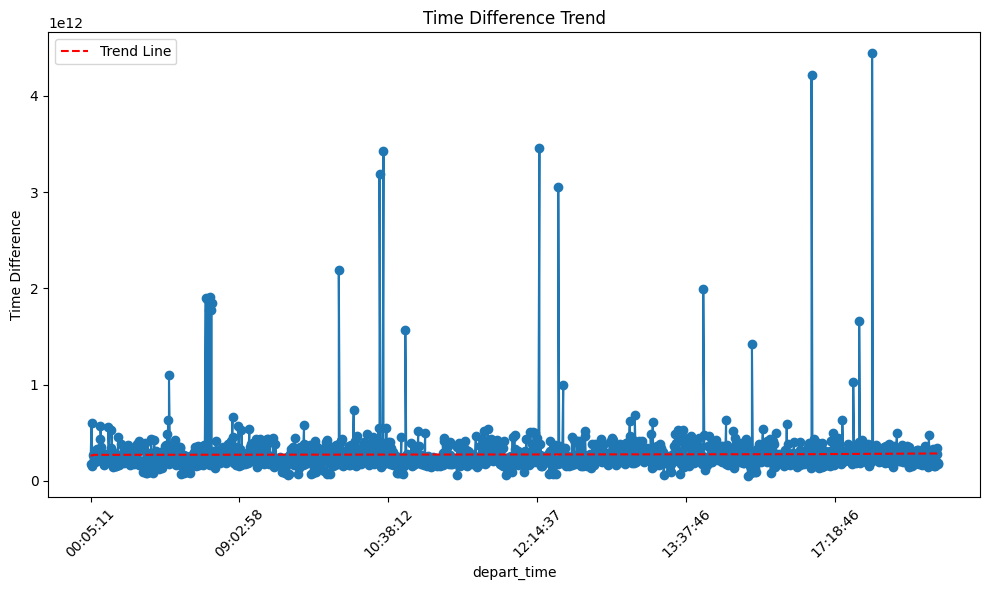

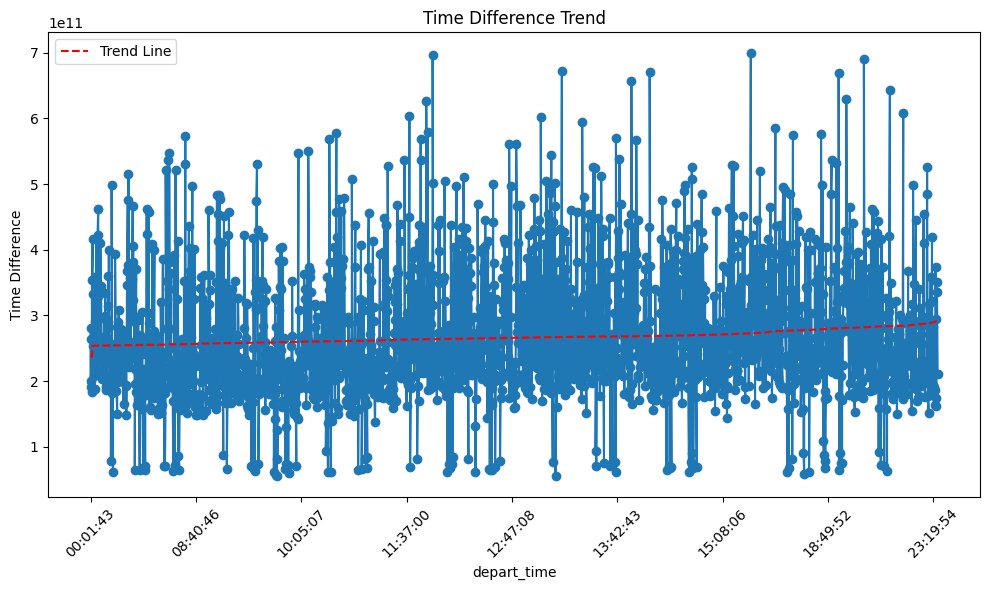

In [15]:
similiarstopDataFrame = pd.read_excel(configData.get("SimiliarStopids"), engine="openpyxl").reset_index(drop=True)
groupid, timepointTable = getGroupIDSTimepoint(similiarstopDataFrame)
groupid = groupid.values()
groupid = list(set(groupid))
days = configData.get("DaysColumn")
for day in days:
    for stop in groupid: 
        print("Stop", stop)
        print("day", day)
        filtered_training_data, filtered_testing_data, time_column = filter_datasets(stop, day)
        print(filtered_training_data)
        if len(filtered_training_data) > 0 or len(filtered_testing_data) > 0: 
            filtered_training_data = Viszualize_Train_Data(filtered_training_data, time_column)
            filtered_testing_data = Viszualize_Test_Data(filtered_testing_data, time_column)
            forecast, arima_results = ARMA_MODEL(time_column, filtered_training_data)
            predict_model(arima_results, forecast, filtered_testing_data, time_column, ArchivedFolder+"/Model_Result/"+str(stop)+".csv")